In [2]:
import opendatasets as od 
import pandas 

od.download( 
	"https://www.kaggle.com/datasets/muratkokludataset/acoustic-extinguisher-fire-dataset") 


Skipping, found downloaded files in "./acoustic-extinguisher-fire-dataset" (use force=True to force download)


In [3]:
import csv
with open('coffee_shop_revenue.csv', mode ='r')as file:
  csvFile = csv.reader(file)
  for lines in csvFile:
        print(lines)


['Number_of_Customers_Per_Day', 'Average_Order_Value', 'Operating_Hours_Per_Day', 'Number_of_Employees', 'Marketing_Spend_Per_Day', 'Location_Foot_Traffic', 'Daily_Revenue']
['152', '6.74', '14', '4', '106.62', '97', '1547.81']
['485', '4.5', '12', '8', '57.83', '744', '2084.68']
['398', '9.09', '6', '6', '91.76', '636', '3118.39']
['320', '8.48', '17', '4', '462.63', '770', '2912.2']
['156', '7.44', '17', '2', '412.52', '232', '1663.42']
['121', '8.88', '6', '9', '183.49', '484', '1155.18']
['238', '9', '11', '4', '331.35', '156', '2179.13']
['70', '7.81', '10', '3', '273.27', '237', '890.17']
['152', '8.78', '14', '2', '341.79', '825', '1704.94']
['171', '7.73', '7', '5', '344.51', '135', '2025.55']
['264', '7.6', '13', '14', '318.08', '885', '2099.66']
['380', '7.14', '16', '9', '140.39', '892', '2568.92']
['137', '8.15', '10', '14', '29.11', '505', '1367.08']
['422', '3.69', '7', '4', '233.23', '186', '1817.02']
['149', '9.11', '15', '2', '446.58', '907', '1707.13']
['409', '9.04',

In [30]:
import pandas as pd

# Load your dataset
data = pd.read_csv('coffee_shop_revenue.csv')

# Get the number of samples (rows)
num_samples = data.shape[0]

print(f'The number of samples in the dataset is: {num_samples}')

The number of samples in the dataset is: 2000


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error

# 1. Load your dataset
data = pd.read_csv('coffee_shop_revenue.csv')

# 2. Features and target
X = data.drop(columns=['Daily_Revenue']).astype(float)  # Convert to float for modeling
y = data['Daily_Revenue'].astype(float)

# 3. Initialize K-Fold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# 4. Initialize models
linear_model = LinearRegression()
ridge_model = Ridge(alpha=1)  # Adjust alpha as needed

# 5. Store results
linear_train_errors = []
linear_val_errors = []
ridge_train_errors = []
ridge_val_errors = []

# 6. Cross-validation for both models
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Linear Regression
    linear_model.fit(X_train, y_train)
    y_linear_train_pred = linear_model.predict(X_train)
    y_linear_val_pred = linear_model.predict(X_test)
    
    linear_train_mse = mean_squared_error(y_train, y_linear_train_pred)
    linear_val_mse = mean_squared_error(y_test, y_linear_val_pred)
    
    linear_train_errors.append(linear_train_mse)
    linear_val_errors.append(linear_val_mse)

    # Ridge Regression
    ridge_model.fit(X_train, y_train)
    y_ridge_train_pred = ridge_model.predict(X_train)
    y_ridge_val_pred = ridge_model.predict(X_test)
    
    ridge_train_mse = mean_squared_error(y_train, y_ridge_train_pred)
    ridge_val_mse = mean_squared_error(y_test, y_ridge_val_pred)
    
    ridge_train_errors.append(ridge_train_mse)
    ridge_val_errors.append(ridge_val_mse)

# 7. Calculate average MSE across folds for both models
average_linear_train_mse = np.mean(linear_train_errors)
average_linear_val_mse = np.mean(linear_val_errors)
average_ridge_train_mse = np.mean(ridge_train_errors)
average_ridge_val_mse = np.mean(ridge_val_errors)

# 8. Print MSE results
print(f'Linear Regression - Average Training MSE: {average_linear_train_mse:.2f}')
print(f'Linear Regression - Average Validation MSE: {average_linear_val_mse:.2f}')
print(f'Ridge Regression - Average Training MSE: {average_ridge_train_mse:.2f}')
print(f'Ridge Regression - Average Validation MSE: {average_ridge_val_mse:.2f}')

# 9. Plotting
plt.figure(figsize=(10, 5))
plt.plot(range(1, kf.n_splits + 1), linear_val_errors, marker='o', label='Linear Regression Validation MSE')
plt.plot(range(1, kf.n_splits + 1), ridge_val_errors, marker='o', label='Ridge Regression Validation MSE')
plt.title('K-Fold Cross-Validation MSE for Linear and Ridge Regression')
plt.xlabel('Fold Number')
plt.ylabel('Mean Squared Error (MSE)')
plt.xticks(range(1, kf.n_splits + 1))
plt.legend()
plt.grid()import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score

# 1. Load your dataset
data = pd.read_csv('coffee_shop_revenue.csv')

# 2. Features and target
X = data.drop(columns=['Daily_Revenue']).astype(float)  # Convert to float for modeling
y = data['Daily_Revenue'].astype(float)

# 3. Initialize K-Fold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# 4. Initialize models
linear_model = LinearRegression()
ridge_model = Ridge(alpha=1)  # Adjust alpha as needed

# 5. Store results
linear_train_errors = []
linear_val_errors = []
ridge_train_errors = []
ridge_val_errors = []
linear_train_r2 = []
linear_val_r2 = []
ridge_train_r2 = []
ridge_val_r2 = []

# 6. Cross-validation for both models
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Linear Regression
    linear_model.fit(X_train, y_train)
    y_linear_train_pred = linear_model.predict(X_train)
    y_linear_val_pred = linear_model.predict(X_test)

    # Calculate MSE and R²
    linear_train_mse = mean_squared_error(y_train, y_linear_train_pred)
    linear_val_mse = mean_squared_error(y_test, y_linear_val_pred)
    linear_train_r2_value = r2_score(y_train, y_linear_train_pred)  # Changed variable name
    linear_val_r2_value = r2_score(y_test, y_linear_val_pred)      # Changed variable name

    # Append results
    linear_train_errors.append(linear_train_mse)
    linear_val_errors.append(linear_val_mse)
    linear_train_r2.append(linear_train_r2_value)  # Append the calculated R² value
    linear_val_r2.append(linear_val_r2_value)      # Append the calculated R² value

    # Ridge Regression
    ridge_model.fit(X_train, y_train)
    y_ridge_train_pred = ridge_model.predict(X_train)
    y_ridge_val_pred = ridge_model.predict(X_test)

    # Calculate MSE and R²
    ridge_train_mse = mean_squared_error(y_train, y_ridge_train_pred)
    ridge_val_mse = mean_squared_error(y_test, y_ridge_val_pred)
    ridge_train_r2_value = r2_score(y_train, y_ridge_train_pred)  # Changed variable name
    ridge_val_r2_value = r2_score(y_test, y_ridge_val_pred)      # Changed variable name

    # Append results
    ridge_train_errors.append(ridge_train_mse)
    ridge_val_errors.append(ridge_val_mse)
    ridge_train_r2.append(ridge_train_r2_value)  # Append the calculated R² value
    ridge_val_r2.append(ridge_val_r2_value)      # Append the calculated R² value

# 7. Calculate average MSE and R-squared across folds for both models
average_linear_train_mse = np.mean(linear_train_errors)
average_linear_val_mse = np.mean(linear_val_errors)
average_ridge_train_mse = np.mean(ridge_train_errors)
average_ridge_val_mse = np.mean(ridge_val_errors)

average_linear_train_r2 = np.mean(linear_train_r2)
average_linear_val_r2 = np.mean(linear_val_r2)
average_ridge_train_r2 = np.mean(ridge_train_r2)
average_ridge_val_r2 = np.mean(ridge_val_r2)

# 8. Print MSE and R-squared results
print(f'Linear Regression - Average Training MSE: {average_linear_train_mse:.2f}')
print(f'Linear Regression - Average Validation MSE: {average_linear_val_mse:.2f}')
print(f'Linear Regression - Average Training R²: {average_linear_train_r2:.2f}')
print(f'Linear Regression - Average Validation R²: {average_linear_val_r2:.2f}')

print(f'Ridge Regression - Average Training MSE: {average_ridge_train_mse:.2f}')
print(f'Ridge Regression - Average Validation MSE: {average_ridge_val_mse:.2f}')
print(f'Ridge Regression - Average Training R²: {average_ridge_train_r2:.2f}')
print(f'Ridge Regression - Average Validation R²: {average_ridge_val_r2:.2f}')

# 9. Plotting
plt.figure(figsize=(10, 5))
plt.plot(range(1, kf.n_splits + 1), linear_val_errors, marker='o', label='Linear Regression Validation MSE')
plt.plot(range(1, kf.n_splits + 1), ridge_val_errors, marker='o', label='Ridge Regression Validation MSE')
plt.title('K-Fold Cross-Validation MSE for Linear and Ridge Regression')
plt.xlabel('Fold Number')
plt.ylabel('Mean Squared Error (MSE)')
plt.xticks(range(1, kf.n_splits + 1))
plt.legend()
plt.grid()
plt.show()
plt.show()




SyntaxError: invalid syntax (1875929591.py, line 76)

Linear Regression - MSE: 97569.72, R²: 0.90
Ridge Regression - MSE: 97143.18, R²: 0.90


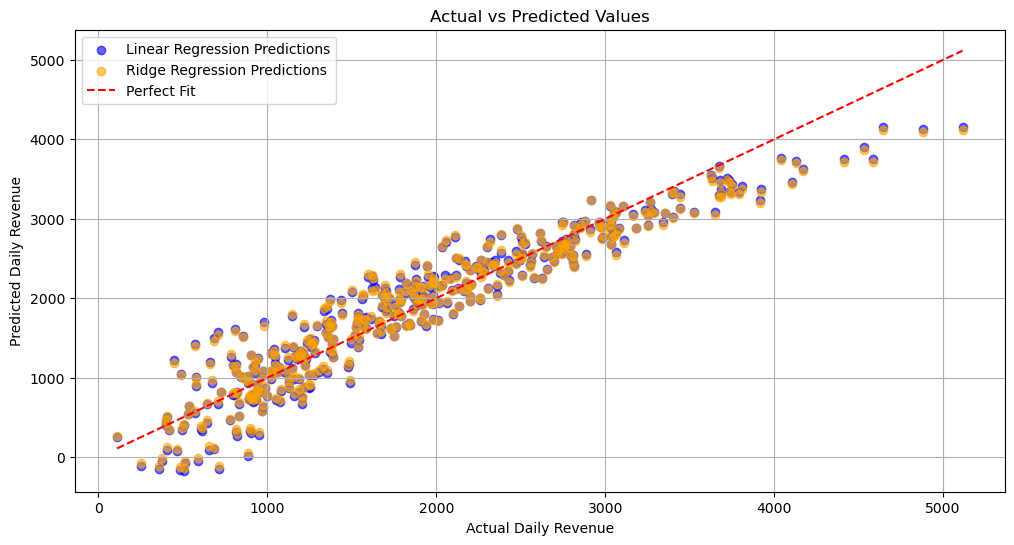

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score

# 1. Load your dataset
data = pd.read_csv('coffee_shop_revenue.csv')

# 2. Features and target
X = data.drop(columns=['Daily_Revenue']).astype(float)  # Convert to float for modeling
y = data['Daily_Revenue'].astype(float)

# 3. Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Initialize models
linear_model = LinearRegression()
ridge_model = Ridge(alpha= 360)  # Adjust alpha as needed

# 5. Fit models
linear_model.fit(X_train, y_train)
ridge_model.fit(X_train, y_train)

# 6. Predictions
y_linear_pred = linear_model.predict(X_test)
y_ridge_pred = ridge_model.predict(X_test)

# 7. Calculate MSE and R² for both models
linear_mse = mean_squared_error(y_test, y_linear_pred)
ridge_mse = mean_squared_error(y_test, y_ridge_pred)
linear_r2 = r2_score(y_test, y_linear_pred)
ridge_r2 = r2_score(y_test, y_ridge_pred)

# 8. Print MSE and R² results
print(f'Linear Regression - MSE: {linear_mse:.2f}, R²: {linear_r2:.2f}')
print(f'Ridge Regression - MSE: {ridge_mse:.2f}, R²: {ridge_r2:.2f}')

# 9. Plotting
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_linear_pred, color='blue', label='Linear Regression Predictions', alpha=0.6)
plt.scatter(y_test, y_ridge_pred, color='orange', label='Ridge Regression Predictions', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Perfect Fit')
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Daily Revenue')
plt.ylabel('Predicted Daily Revenue')
plt.legend()
plt.grid()
plt.show()

In [30]:
# Assuming previous code has been executed

# Get coefficients for Linear Regression
linear_coefficients = linear_model.coef_
linear_intercept = linear_model.intercept_

# Get coefficients for Ridge Regression
ridge_coefficients = ridge_model.coef_
ridge_intercept = ridge_model.intercept_

# Create a DataFrame to display the coefficients
features = X.columns
coefficients_df = pd.DataFrame({
    'Feature': features,
    'Linear Regression Coefficient': linear_coefficients,
    'Ridge Regression Coefficient': ridge_coefficients
})

# Add intercepts to the DataFrame
coefficients_df.loc[len(coefficients_df)] = ['Intercept', linear_intercept, ridge_intercept]

# Display the coefficients
print(coefficients_df)

                       Feature  Linear Regression Coefficient  \
0  Number_of_Customers_Per_Day                       5.572657   
1          Average_Order_Value                     245.180947   
2      Operating_Hours_Per_Day                       0.267677   
3          Number_of_Employees                      -1.773529   
4      Marketing_Spend_Per_Day                       1.536426   
5        Location_Foot_Traffic                       0.017338   
6                    Intercept                   -1535.513001   

   Ridge Regression Coefficient  
0                      5.572605  
1                    245.018132  
2                      0.265647  
3                     -1.772873  
4                      1.536507  
5                      0.017412  
6                  -1534.518728  


Linear Regression - MSE: 97569.72, R²: 0.90
Ridge Regression - MSE: 97540.15, R²: 0.90


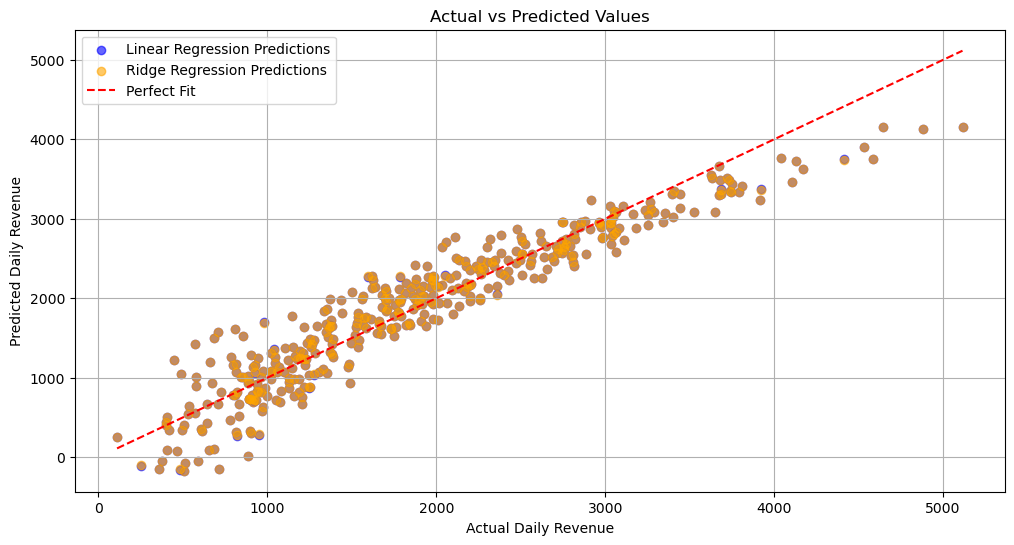

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score

# 1. Load your dataset
data = pd.read_csv('coffee_shop_revenue.csv')

# 2. Features and target
X = data.drop(columns=['Daily_Revenue']).astype(float)  # Convert to float for modeling
y = data['Daily_Revenue'].astype(float)

# 3. Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Initialize models
linear_model = LinearRegression()
ridge_model = Ridge(alpha=10)  # Adjust alpha as needed

# 5. Fit models
linear_model.fit(X_train, y_train)
ridge_model.fit(X_train, y_train)

# 6. Predictions
y_linear_pred = linear_model.predict(X_test)
y_ridge_pred = ridge_model.predict(X_test)

# 7. Calculate MSE and R² for both models
linear_mse = mean_squared_error(y_test, y_linear_pred)
ridge_mse = mean_squared_error(y_test, y_ridge_pred)
linear_r2 = r2_score(y_test, y_linear_pred)
ridge_r2 = r2_score(y_test, y_ridge_pred)

# 8. Print MSE and R² results
print(f'Linear Regression - MSE: {linear_mse:.2f}, R²: {linear_r2:.2f}')
print(f'Ridge Regression - MSE: {ridge_mse:.2f}, R²: {ridge_r2:.2f}')

# 9. Plotting
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_linear_pred, color='blue', label='Linear Regression Predictions', alpha=0.6)
plt.scatter(y_test, y_ridge_pred, color='orange', label='Ridge Regression Predictions', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Perfect Fit')
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Daily Revenue')
plt.ylabel('Predicted Daily Revenue')
plt.legend()
plt.grid()
plt.show()

Linear Regression - Average Training MSE: 103206.12
Linear Regression - Average Validation MSE: 103842.19
Linear Regression - Average Training R²: 0.89
Linear Regression - Average Validation R²: 0.89
Ridge Regression - Average Training MSE: 103206.13
Ridge Regression - Average Validation MSE: 103842.12
Ridge Regression - Average Training R²: 0.89
Ridge Regression - Average Validation R²: 0.89


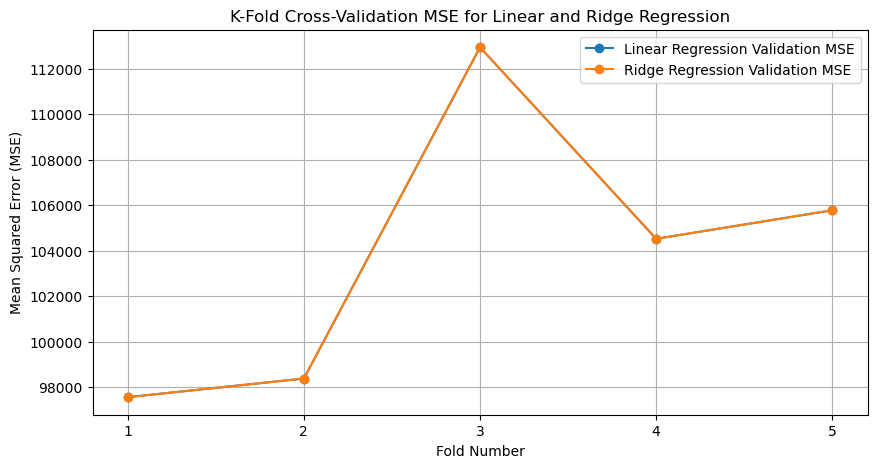

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score

# 1. Load your dataset
data = pd.read_csv('coffee_shop_revenue.csv')

# 2. Features and target
X = data.drop(columns=['Daily_Revenue']).astype(float)  # Convert to float for modeling
y = data['Daily_Revenue'].astype(float)

# 3. Initialize K-Fold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# 4. Initialize models
linear_model = LinearRegression()
ridge_model = Ridge(alpha=1)  # Adjust alpha as needed

# 5. Store results
linear_train_errors = []
linear_val_errors = []
ridge_train_errors = []
ridge_val_errors = []
linear_train_r2 = []
linear_val_r2 = []
ridge_train_r2 = []
ridge_val_r2 = []

# 6. Cross-validation for both models
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Linear Regression
    linear_model.fit(X_train, y_train)
    y_linear_train_pred = linear_model.predict(X_train)
    y_linear_val_pred = linear_model.predict(X_test)

    # Calculate MSE and R²
    linear_train_mse = mean_squared_error(y_train, y_linear_train_pred)
    linear_val_mse = mean_squared_error(y_test, y_linear_val_pred)
    linear_train_r2_value = r2_score(y_train, y_linear_train_pred)  # Changed variable name
    linear_val_r2_value = r2_score(y_test, y_linear_val_pred)      # Changed variable name

    # Append results
    linear_train_errors.append(linear_train_mse)
    linear_val_errors.append(linear_val_mse)
    linear_train_r2.append(linear_train_r2_value)  # Append the calculated R² value
    linear_val_r2.append(linear_val_r2_value)      # Append the calculated R² value

    # Ridge Regression
    ridge_model.fit(X_train, y_train)
    y_ridge_train_pred = ridge_model.predict(X_train)
    y_ridge_val_pred = ridge_model.predict(X_test)

    # Calculate MSE and R²
    ridge_train_mse = mean_squared_error(y_train, y_ridge_train_pred)
    ridge_val_mse = mean_squared_error(y_test, y_ridge_val_pred)
    ridge_train_r2_value = r2_score(y_train, y_ridge_train_pred)  # Changed variable name
    ridge_val_r2_value = r2_score(y_test, y_ridge_val_pred)      # Changed variable name

    # Append results
    ridge_train_errors.append(ridge_train_mse)
    ridge_val_errors.append(ridge_val_mse)
    ridge_train_r2.append(ridge_train_r2_value)  # Append the calculated R² value
    ridge_val_r2.append(ridge_val_r2_value)      # Append the calculated R² value

# 7. Calculate average MSE and R-squared across folds for both models
average_linear_train_mse = np.mean(linear_train_errors)
average_linear_val_mse = np.mean(linear_val_errors)
average_ridge_train_mse = np.mean(ridge_train_errors)
average_ridge_val_mse = np.mean(ridge_val_errors)

average_linear_train_r2 = np.mean(linear_train_r2)
average_linear_val_r2 = np.mean(linear_val_r2)
average_ridge_train_r2 = np.mean(ridge_train_r2)
average_ridge_val_r2 = np.mean(ridge_val_r2)

# 8. Print MSE and R-squared results
print(f'Linear Regression - Average Training MSE: {average_linear_train_mse:.2f}')
print(f'Linear Regression - Average Validation MSE: {average_linear_val_mse:.2f}')
print(f'Linear Regression - Average Training R²: {average_linear_train_r2:.2f}')
print(f'Linear Regression - Average Validation R²: {average_linear_val_r2:.2f}')

print(f'Ridge Regression - Average Training MSE: {average_ridge_train_mse:.2f}')
print(f'Ridge Regression - Average Validation MSE: {average_ridge_val_mse:.2f}')
print(f'Ridge Regression - Average Training R²: {average_ridge_train_r2:.2f}')
print(f'Ridge Regression - Average Validation R²: {average_ridge_val_r2:.2f}')

# 9. Plotting
plt.figure(figsize=(10, 5))
plt.plot(range(1, kf.n_splits + 1), linear_val_errors, marker='o', label='Linear Regression Validation MSE')
plt.plot(range(1, kf.n_splits + 1), ridge_val_errors, marker='o', label='Ridge Regression Validation MSE')
plt.title('K-Fold Cross-Validation MSE for Linear and Ridge Regression')
plt.xlabel('Fold Number')
plt.ylabel('Mean Squared Error (MSE)')
plt.xticks(range(1, kf.n_splits + 1))
plt.legend()
plt.grid()
plt.show()